In [18]:
import catboost
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from typing import List

import pandas as pd
from scipy import stats
import datetime
import rpy2
from functools import reduce
from catboost import CatBoostRegressor
import time
import seaborn as sns
import ast
import numpy as np
from dateutil import parser
from kshape.core import kshape, zscore
from tslearn.clustering import KShape
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import catboost
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
import time
import pickle
import warnings

In [2]:
# Path fo import files
#input data
import_frontenddata = "import/startup/frontendData.csv"
import_orderdata = "import/startup/orderdata.csv"
import_userdata = "import/startup/userdata.csv"
#generated data
transformed_analyzed_events = 'export/startup/time_series_events.csv'
transformed_analyzed_amount = 'export/startup/time_series_amount.csv'

monetary_time_series = "export/startup/startup_monetary_2000.csv"
frequency_time_series = "export/startup/startup_frequency_2000.csv"
recency_time_series = "export/startup/startup_recency_2000.csv"
cluster_centroids_time_series = "export/startup/startup_cluster_centroids_2000.csv"
#prediction
prediction_path = "export/startup/startup_prediction.csv"

### 0. Impove preprocessed TS and change hash to real id

In [3]:
# STARTUP: change hash to real id
df_user = pd.read_csv(import_userdata).drop(columns =['Unnamed: 0','supplier','country']).reset_index()
time_series_ordered_amount = pd.read_csv(transformed_analyzed_amount)
time_series_ordered_amount = time_series_ordered_amount.merge(df_user, left_on = 'userid',right_on='id').drop(columns = ['id','userid'])
cols = time_series_ordered_amount.columns.tolist()
cols = cols[-1:] + cols[:-1]
time_series_ordered_amount = time_series_ordered_amount[cols] 
time_series_ordered_amount.rename(columns={'index':'id'}, inplace=True)
time_series_ordered_amount= time_series_ordered_amount.fillna(0)
#ids = time_series_ordered_amount['id'].copy()
# Change values for classifier (0 - no purchase, 1 - purchase)
#time_series_ordered_amount[time_series_ordered_amount>0]=1
#time_series_ordered_amount['id'] = ids
time_series_ordered_amount.sample(5)

,id,2018-07-05,2018-07-06,2018-07-08,2018-07-09,2018-07-10,2018-07-11,2018-07-12,2018-07-13,2018-07-14,...,2019-02-23,2019-02-24,2019-02-25,2019-02-26,2019-02-27,2019-02-28,2019-03-01,2019-03-02,2019-03-03,2019-03-04
1558,6430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,6071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1235,2845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,11.0,0.0
14,3965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
1087,4200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,40.0,0.0,98.0,52.0,12.0,0.0,0.0,152.0,0.0


In [10]:
starting_index = int(len(time_series_ordered_amount.columns[1:])*0.70)
end_index = len(time_series_ordered_amount.columns[1:])
print("Initial train/test split:", round(starting_index/end_index,2))

Initial train/test split: 0.7


In [14]:
# List classifiers
clfs = [
    DecisionTreeClassifier (max_depth= 7),
    RandomForestClassifier(n_estimators = 100,max_depth =3),
    KNeighborsClassifier(n_neighbors = 3),
    LogisticRegression(solver='lbfgs'),
    GaussianNB(),
    SGDClassifier(max_iter=5,tol=1e3),
    SVC(gamma='scale' ), 
    MLPClassifier(solver='lbfgs')]

In [20]:
clfs_names = ["Decision Tree","Random Forest","KNN","Logistic","Naive B","Stochastic GD","SVC","Neural Network"]
Scores = pd.DataFrame(columns = ["Precision","Recall","F1","ROC AUC"])

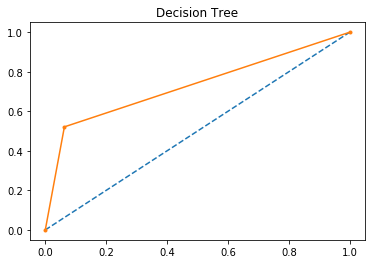

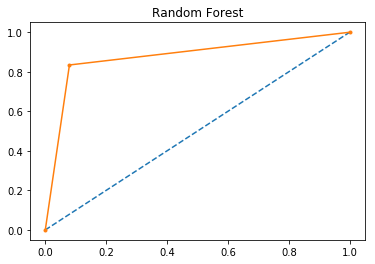

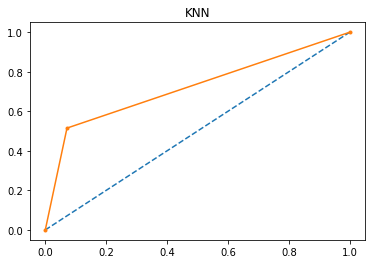

C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iter

C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iter

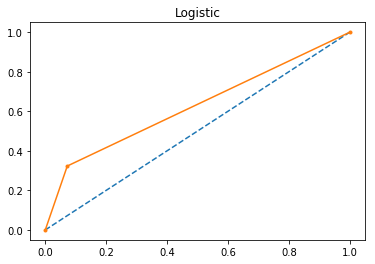

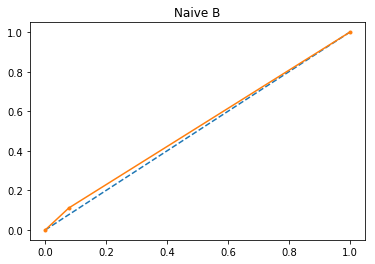

C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3

C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3

C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Alexander\Anaconda3

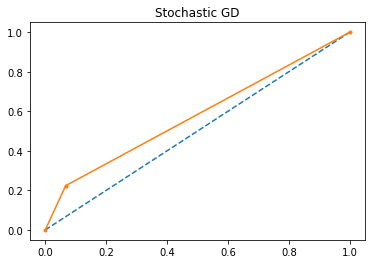

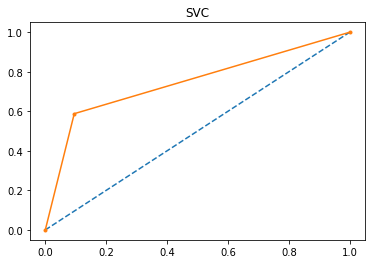

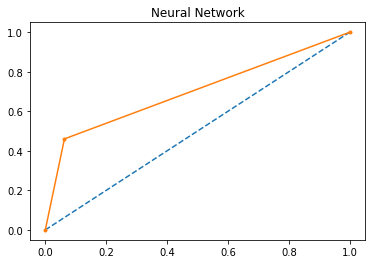

In [33]:
for clf,name in zip(clfs,clfs_names):
    predictions = []
    true_values = []
    for threshold in list(range(starting_index,end_index)):
        #wo id
        X_train  = time_series_ordered_amount.iloc[:,1:threshold] 
        y_train  = time_series_ordered_amount.iloc[:,threshold].copy()
        y_train[y_train>0]=1
        X_test = time_series_ordered_amount.iloc[:,2:threshold+1] # to secure consistent # of features
        y_test = time_series_ordered_amount.iloc[:,threshold+1].copy() 
        y_test[y_test>0]=1
        clf.fit(X_train,y_train)
        predictions.append(clf.predict(X_test))
        true_values.append(y_test)

    predictions = np.ravel(predictions)    
    true_values = np.ravel(true_values)
    scores1 = precision_score(predictions,true_values)
    scores2 = recall_score(predictions,true_values)
    scores3 = f1_score(predictions,true_values)
    scores4 = roc_auc_score(predictions,true_values)
    Scores.loc[name] = [scores1,scores2,scores3,scores4]
    
    
    fpr, tpr, thresholds = roc_curve(predictions,true_values)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.title(name)
    plt.savefig("Export/plots/roc_curve_"+name+".jpg",dip =300)
    plt.show()

In [23]:
Scores.round(2)

,Precision,Recall,F1,ROC AUC
Decision Tree,0.40,0.52,0.45,0.73
Random Forest,0.20,0.83,0.32,0.88
KNN,0.30,0.52,0.38,0.72
Logistic,0.32,0.32,0.32,0.63
Naive B,0.65,0.11,0.19,0.52
Stochastic GD,0.41,0.22,0.29,0.58
SVC,0.01,0.59,0.03,0.75
Neural Network,0.40,0.47,0.43,0.70


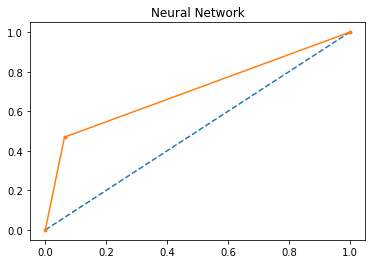